<a href="https://colab.research.google.com/github/PinEcone12/NS_NN/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   25.0  -10.00  -160.00  0.35711E+01  0.55398E+01  0.497746E+00  \
0  25.0   -10.0   -280.0       3.5784       5.5518      0.531587   
1  25.0   -10.0    -40.0       3.5643       5.5289      0.468530   
2  25.0   -10.0   -400.0       3.5864       5.5653      0.571234   
3  25.0   -10.0   -520.0       3.5952       5.5805      0.618214   
4  25.0   -10.0    200.0       3.5523       5.5102      0.406475   

   0.445112E+01  -0.82059665E+01  -0.87420917E+01  -0.87833610E+01  ...  \
0       4.68550        -8.206019        -8.742303        -8.805705  ...   
1       4.26366        -8.205919        -8.741900        -8.762584  ...   
2       4.95555        -8.206075        -8.742537        -8.829856  ...   
3       5.28271        -8.206138        -8.742799        -8.856103  ...   
4       3.84318        -8.205834        -8.741567        -8.724981  ...   

   0.26650E+01  0.34053E+01  0.34672E+01  0.37120E+01  0.47085E+01  \
0       2.6653       3.4061       3.4616       3.7130       4.6989   


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - loss: 52.5921 - mae: 6.3005 - val_loss: 44.6421 - val_mae: 5.8079 - learning_rate: 0.0010
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 44.3117 - mae: 6.1281 - val_loss: 43.8452 - val_mae: 5.7789 - learning_rate: 0.0010
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 45.3947 - mae: 6.3710 - val_loss: 43.0577 - val_mae: 5.7461 - learning_rate: 0.0010
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 40.6253 - mae: 6.0542 - val_loss: 42.3791 - val_mae: 5.7221 - learning_rate: 0.0010
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 39.6415 - mae: 6.0087 - val_loss: 41.9708 - val_mae: 5.7164 - learning_rate: 0.0010
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 39.9085 - mae: 6.0561 - val_loss: 41.9001 - val_mae: 5.7344 - learning_rate: 0.0010
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 40.1791 - mae: 6.1773 - val_loss: 42.0888 - val_mae: 5.7730 - learning_rate: 0.0010
Epoch 8/300
4/4 ━

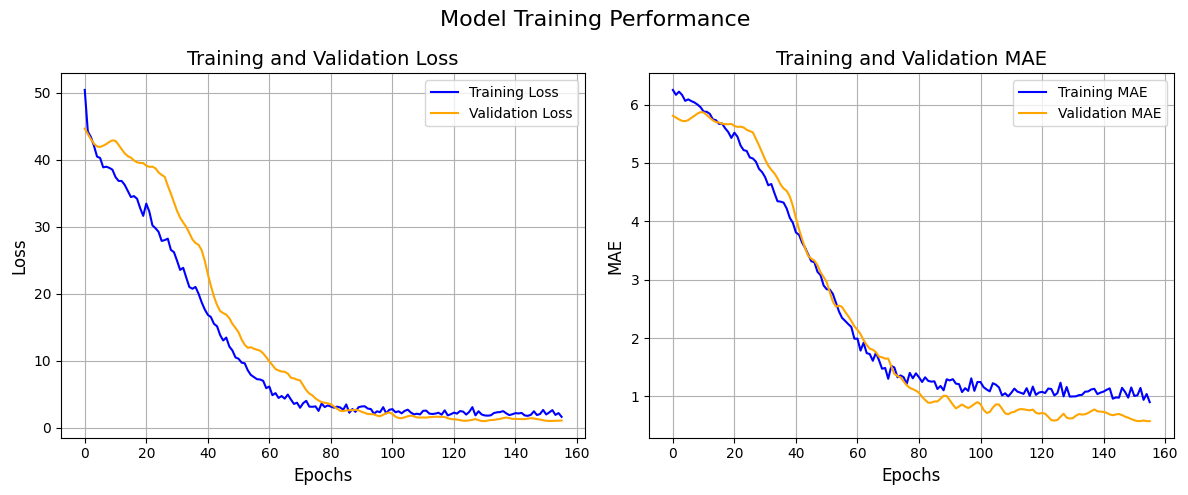

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Actual Neutron Skin: 4.67455 | Predicted Neutron Skin: 4.55550 | Difference: 0.11905
Actual Neutron Skin: 7.78583 | Predicted Neutron Skin: 7.06050 | Difference: 0.72533
Actual Neutron Skin: 9.83886 | Predicted Neutron Skin: 8.74051 | Difference: 1.09835
Actual Neutron Skin: 9.52429 | Predicted Neutron Skin: 8.39682 | Difference: 1.12747
Actual Neutron Skin: 4.43848 | Predicted Neutron Skin: 4.32294 | Difference: 0.11554
Actual Neutron Skin: 3.06423 | Predicted Neutron Skin: 2.89414 | Difference: 0.17009
Actual Neutron Skin: 4.71277 | Predicted Neutron Skin: 4.41720 | Difference: 0.29557
Actual Neutron Skin: 3.03744 | Predicted Neutron Skin: 3.28171 | Difference: 0.24427
Actual Neutron Skin: 3.58273 | Predicted Neutron Skin: 3.95359 | Difference: 0.37086
Actual Neutron Skin: 18.2094 | Predicted Neutron Skin: 14.38727 | Difference: 3.82213
Actual Neutron Skin: 12.3576 | Predicted Neutron Skin: 10.96051 | Difference: 1.39709
Actual Neutron Skin: 3.14

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the dataset (adjust delimiter if needed, assuming space-separated for this example)
file_path = 'table_nuclear_properties_rn_alph_BE_rc_Ec_pc_7^3wider_msmv0907.txt'
data = pd.read_csv(file_path, delimiter=' ')  # Adjust delimiter if needed

# Check the first few rows to ensure it's loaded correctly
print(data.head())

# Extract the first three columns (J, L, K_sym) as input features
x_data = data.iloc[:, [0, 1, 2]].values  # The first three columns: J, L, Ksym

# Extract the neutron skin of Pb-208 (7th column) as the target output
y_data = data.iloc[:, 6].values  # Column 7 is the neutron skin of Pb-208 (index 6 in Python)

# Normalize the input features
scaler = StandardScaler()
x_data = scaler.fit_transform(x_data)

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Checking the shape of the data
print("Feature matrix (x_train):", x_train.shape)
print("Target matrix (y_train):", y_train.shape)
print("Feature matrix (x_test):", x_test.shape)
print("Target matrix (y_test):", y_test.shape)

# Building the Sequential neural network model for regression
model = tf.keras.Sequential([
    tf.keras.layers.Dense(390, input_dim=3, activation='relu'), #Input layer
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(250, activation='relu'), #hidden layer 1
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(100, activation='relu'), #hidden layer 1
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(60, activation='relu'), #hidden layer 2
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='linear')  # Linear activation for regression (single output)
])

# Compile the model for regression
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])

# Callbacks: Early Stopping and Learning Rate Scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=15, factor=0.4, min_lr=1e-6)

# Training the model with training data
history = model.fit(x_train, y_train, epochs=300,
                    batch_size=65,
                    validation_split=0.2,
                    callbacks=[early_stopping, lr_scheduler])

# Evaluate the model on test data
results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss, Test MAE:', results)

# Visualization of Training and Validation Loss
plt.figure(figsize=(12, 5))

# Plotting Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

# Plotting Training and Validation MAE (Mean Absolute Error)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE', color='blue')
plt.plot(history.history['val_mae'], label='Validation MAE', color='orange')
plt.title('Training and Validation MAE', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.legend()
plt.grid(True)

plt.suptitle("Model Training Performance", fontsize=16)
plt.tight_layout()
plt.show()

# Get predictions from the model on the test set
y_pred = model.predict(x_test)
y_pred_rounded = [f"{value:.5f}" for value in y_pred.flatten()]
y_pred_rounded_float = [float(value) for value in y_pred_rounded]

# Calculate the absolute difference between actual and predicted neutron skin values
differences = np.abs(y_test - y_pred_rounded_float)
differences_rounded = [f"{diff:.5f}" for diff in differences]

# Print the actual neutron skin values, predicted values, and their differences
for i in range(len(x_test)):
    print(f"Actual Neutron Skin: {y_test[i]} | Predicted Neutron Skin: {y_pred_rounded[i]} | Difference: {differences_rounded[i]}")

# Print the summary of the model to see the architecture and parameters
#model.summary()


#Saving the entire NN
#model.save('Pingu.h5')

#DNN error stuff